<font size=6>**Machine Learning Practises**</font>

    or: "How I Learned to Stop Worrying and Love the Black Box"

In this session we will focus on the fundamentals of the **Machine Learning** (**ML**) approach.<br>
We will:

- formalize some **concepts** encountered in previous classes
- outline procedural **protocols**
- highlight **good practises** and common **mistakes**

$\rightarrow$ The target is to understand <u>how to operate</u> "the black box" and make it transparent (_to us, not the referee :p_).

# The Black Box problem

_One step back $-$ what is **Machine Learning**?_
<br>
> A branch of _Artificial Intelligence_ (_AI_) which regards algorithms that can <u>improve their performance through experience and data</u>.

<table><tr>
    <td width=640>
        <img src="images/ML_AI.png">
        <center>
            <br>
            Figure 0.  The ML landscape.
            <br>
            (From <a href="https://www.researchgate.net/figure/Relationship-between-artificial-intelligence-AI-machine-learning-ML-and-deep_fig1_338083201">here</a>)
        </center>
    </td>
</tr></table>

ML can be best understood when compared to the **traditional** approach:

<table><tr>
    <td width=640>
        <img src="images/traditional_vs_ML.png">
        <center>
            <br>
            Figure 1.1.  The traditional approach (<i>top</i>) compared to the ML one (<i>bottom</i>).
            <br>
            (From <a href="https://github.com/ageron/handson-ml2">Gerone, A. "<i>Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow</i>"</a>)
        </center>
    </td>
</tr></table>

Differently from the hard-coded approaches followed by traditional modelling, ML proposes a **train-application** scheme.

The idea is that:
- a machine (a computer) can learn the **parameters** of an arbitrarily complex model by **training** over some input **data**
- the "**Analize errors**" task is performed by the machine itself
- once the model is trained, the machine can predict the response for previously **unseen data**.

- - -

Hence, the **Black Box problem** arises:

> _"We will <u>always</u> get an output, but is that correct?"_

$\rightarrow$ In order to evaluate our "box" we need to have:
- complete control over **inputs** and **outputs**
- a solid **assessement** protocol

_This brings us to ..._

## Basic ingredients for a successful ML model

1. **Metrics of performance (_previous notebooks_)**
    > _"Wait $-$ is this a bug or a feature?"_

3. **Clean data (_this notebook_)**<br>
    > _"garbage in, garbage out"_<br>
    > _~literally any wannabe data analyst on youtube_

3. **Protocols: training, validation, and test sets (_this & next notebook_)**
    > _"Divide [train de probatio] et impera"_

# Data Pre-processing

## Data visualization

When possible, let's **see** the data, or at least their **statistical properties**.

We will generate and observe some mock data with `sklearn.datasets.make_classification`:
- very useful tool to **quickly test** your algos!
- can set **properties** as the number of _samples_ and _features_, of the _informative_ and _redundant_ features, etc.

In [ ]:
from sklearn.datasets import make_classification
from prettytable import PrettyTable
import numpy as np
import pandas as pd

X, y = make_classification(n_samples=100, n_features=3, n_informative=1,
                           n_redundant=1, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1, weights=None, flip_y=0.01,
                           class_sep=1.0, hypercube=True, shift=0.0, scale=1.0,
                           shuffle=True, random_state=42)

table = PrettyTable()
table.title = str('Data shape')
table.field_names = ['X', 'y']
table.add_row([np.shape(X), np.shape(y)])
print(table)

feature_names = ["X"+str(i) for i in range(np.shape(X)[1])]

# Converting data to dataframe:
df_data = pd.DataFrame(data=np.append(X, y[:,None],1), columns=feature_names+['y'])

# Displaying first 5 rows:
display(df_data.head(10))

### Quick visualization: corner plot with seaborn

`Seaborn` is a powerful tool for quick visualizations.
- Deals **automatically** with plot limits etc.
- **Wide range** of pre-set visualizations: _corner plots_, _violin plots_, etc.
- Needs `pandas.DataFrames` as inputs

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Corner plot:
sns.pairplot(df_data, hue="y")
plt.show()

Which features are:
- redundant?
- informative?

<details>
<summary><b>[Spoiler]</b></summary>
We just need X$_{1}$ or X$_{2}$ for the classification of these data!
</details>

### Covariance and Correlation matrices

We can see the _redundancy_ in a quantitative way, by calculating and displaying the **covariance** and the **correlation** between each pair of features.

> **Covariance** $\rightarrow Cov(X, Y)$ = ${{1}\over{1-N}} \sum_{i=1}^{N} (x_i - E(X))~(y_i - E(Y))$
>
> **Correlation** $\rightarrow Cor(X, Y)$ = ${{Cov~(X, Y)}\over{\sigma_X ~ \sigma_Y}}$ 

We can additionally plot the significance of the correlation, using the $p$-values from a Pearson correlation test (see Hypothesis Testing session!).  Using the `scipy.stats.personr` package ([link](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html)) words:


>_The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets._

In [ ]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
     
# Covariance matrix:
cov = np.cov(X.T)

# Pearson's correlation and p-value matrices:
#  See: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html
cor   = np.zeros((np.shape(X)[1], np.shape(X)[1]))
pvals = np.zeros((np.shape(X)[1], np.shape(X)[1]))

for i in range(np.shape(X)[1]):
    for j in range(np.shape(X)[1]):
        cor[i, j], pvals[i, j] = pearsonr(X[:, i].ravel(), X[:, j].ravel())

# Plotting -------------------------------------------------------------------

# Configure a custom diverging colormap:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Configure a custom diverging colormap:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Converting matrices to dataframes for plotting with seaborn:
def convert_M_to_pd(M, feature_names):
    df = pd.DataFrame(data=M, columns=feature_names)
    df = df.rename(index={i: feature_names[i] for i in range(len(feature_names))})
    return df

df_cov   = convert_M_to_pd(cov, feature_names)
df_cor   = convert_M_to_pd(cor, feature_names)
df_pvals = convert_M_to_pd(pvals, feature_names)

# If you wish to mask the upper (redundant) traingle, uncomment this:
# mask_cor = np.triu(np.ones_like(cor, dtype=bool))
# mask_cov = np.triu(np.ones_like(cov, dtype=bool))
mask_cor = None
mask_cov = None

plt.rcParams['figure.figsize'] = [18, 5]

plt.subplot(1,3,1)
plt.title("Covariance matrix")
sns.heatmap(df_cov, annot=True, mask=mask_cov, cmap=cmap)

plt.subplot(1,3,2)
plt.title("Pearson's correlation matrix")
sns.heatmap(df_cor, annot=True, mask=mask_cor, cmap=cmap)

plt.subplot(1,3,3)
plt.title("Correlation p-values matrix")
sns.heatmap(df_pvals, annot=True, mask=mask_cor, cmap=cmap)

plt.show()
#-----------------------------------------------------------------------------

To get rid of redundant features, we may apply a threshold on **covariance** or **correlation**, and remove one of the two redundant variables.

However, watch out! $\rightarrow$ These matrices only present the _linear_ relations!

### Exploring datasets with many features

Let's look at the same techniques seen above, when the number of features is **untractable**:

<code>n_features</code> = 1000<br>
<code>n_redundant</code> = 300

In [ ]:
from sklearn.datasets import make_classification
from prettytable import PrettyTable
import numpy as np
import pandas as pd

X, y = make_classification(n_samples=100, n_features=1000, n_informative=700,
                           n_redundant=300, n_repeated=0, n_classes=5,
                           n_clusters_per_class=2, weights=None, flip_y=0.01,
                           class_sep=3.0, hypercube=True, shift=0.0, scale=1.0,
                           shuffle=True, random_state=42)

table = PrettyTable()
table.title = str('Data shape')
table.field_names = ['X', 'y']
table.add_row([np.shape(X), np.shape(y)])
print(table)

feature_names = ["X"+str(i) for i in range(np.shape(X)[1])]

# Converting data to dataframe:
df_data = pd.DataFrame(data=np.append(X, y[:,None],1), columns=feature_names+['y'])

# Displaying first 5 rows:
display(df_data.head(10))

We will display _only the last 7 features_, since it is impractical to display them all.

In [ ]:
%%time
# This might take 10+ seconds to plot ...

import seaborn as sns
import matplotlib.pyplot as plt

# Corner plot:
g = sns.pairplot(df_data.iloc[:,-8:], hue="y")
g.fig.set_size_inches(10,10)
plt.show()

Similarly, we cannot visualize the full correlation matrix $\rightarrow$ we might just calculate it and **sort it** by correlation value.

We might only print the significant correlations, e.g. |Cor| > 0.95.

_Some other useful tricks can be found [here](https://likegeeks.com/python-correlation-matrix/)._

In [ ]:
%%time
df_cor = df_data[feature_names].corr()
# NOTE1: This time we used a pandas tool to calculate the correlation
#        matrix (while before we used the equivalent numpy tool) just
#        to show an alternative method for the same thing.
#        This returns a pandas dataframe.

cor_pairs = df_cor.unstack()
# converting correlation dataframe to 1D series

cor_pairs_sort = cor_pairs.sort_values(kind="quicksort")

fig = plt.figure(figsize=(5,3))
plt.title('Distribution of correlation coefficients')
plt.hist(cor_pairs, bins=50)
plt.show()

df_sorted_pairs = pd.DataFrame(cor_pairs_sort).reset_index()
df_sorted_pairs.columns=['feature_A', 'feature_B', 'Cor']

# Let's sort by absolute value:
df_sorted = df_sorted_pairs.sort_values(by='Cor', key=abs)

# Let's keep the top <N> significant correlations:
df_significant_5 = df_sorted.iloc[-5:, :].reset_index(drop=True)

print('Top 5 Significant correlations (excluding same-variable):')
display(df_significant_5)

Hol'on! The top correlations are the variable with itself! $\rightarrow$ We need a cleener view!

### In-class Exercise: remove the same-variable correlations [2 mins]

**Objective**: Display the correlation values distribution, but without the same-variable correlations.

**Task**: You just have to remove the entries where **feature_A**	== **feature_B** (i.e., the diagonal of the correlation matrix) from `df_sorted_pairs`.   It's just 1 or 2 lines of code.

<hr style='height:1px'>

_Our solution_

In [ ]:
%%time
df_cor = df_data[feature_names].corr()
# NOTE1: This time we used a pandas tool to calculate the correlation
#        matrix (while before we used the equivalent numpy tool) just
#        to show an alternative method for the same thing.
#        This returns a pandas dataframe.

cor_pairs = df_cor.unstack()
# converting correlation dataframe to 1D series

cor_pairs_sort = cor_pairs.sort_values(kind="quicksort")

fig = plt.figure(figsize=(5,3))
plt.title('Distribution of correlation coefficients')
plt.hist(cor_pairs, bins=50)
plt.show()

df_sorted_pairs = pd.DataFrame(cor_pairs_sort).reset_index()
df_sorted_pairs.columns=['feature_A', 'feature_B', 'Cor']

# Let's exclude same-variable correlations, which are 1 by definition:
df_nonsame = df_sorted_pairs[ df_sorted_pairs['feature_A'] != df_sorted_pairs['feature_B'] ]

# Let's sort by absolute value:
df_sorted = df_nonsame.sort_values(by='Cor', key=abs)

# Let's keep the top <N> significant correlations:
df_significant_5 = df_sorted.iloc[-5:, :].reset_index(drop=True)

print('Top 5 Significant correlations (excluding same-variable):')
display(df_significant_5)

**<font size=5>Ah!</font> Why there are no other correlations == 1?**

Yet, we have _explicitly_ requested `sklearn.datasets.make_classification` to include redundant features! **Why this time we cannot spot the redundant features?!**

$\rightarrow$ Because a "redundant" feature might be a **linear combination** of the informative features!

<u>SUMMARY:</u> Life is more complicated than simple 1-to-1 relationships, unfortunately, so we cannot easily spot redundant features ...

<table><tr>
    <td width=640>
        <img src="images/MITM.jpg">
    </td>
</tr></table>

_PS: Additionally, remember that the correlation/covariance matrix is ill-defined (singular) for $n_{features}$ > $n_{samples}$.
     A nice explanation can be found [here](https://stats.stackexchange.com/questions/60622/why-is-a-sample-covariance-matrix-singular-when-sample-size-is-less-than-number)._


What can we do, when we face a **large number** of features?
> - Sit in the corner and cry
> - Visualize data with some tricks (see [$\S$Feature reduction](#Feature-reduction))

## Scaling features

NOTE: "Scaling" shall be interpreted as a generic form of **normalization**.

### When do you need to normalize?

- Normalizing is <u>fundamental</u> when adopting algorithms that make use of **distance**.

    _Example: **SVM**, **$k$NN**, or some **hierarchical clustering**_<br>
    $k$NN Measures the distance between a _test_ point $\hat{X}$ and all the _training_ points $X_i$: e.g. || $\hat{X}$ -  ${X_i}$ ||$^2$
  
  
- Normalizing is <u>fundamental</u> when adopting algorithms that **compare** the contribution of **features**.

     _Example: **PCA**_<br>
     PCA requires to scale and center features around 0 [$\S$Feature reduction](#Feature-reduction)


- Normalizing <u>is not necessary</u> with algorithms which look at each feature **independently**

    _Example: **Random Forests**_<br>

<br>

... However, normalizing features is usually a good habit because:

- Scaling <u>helps</u> convergence when features have very different **dynamic ranges**.
 
    _Example: algorithms using **gradient descent** (including **neural networks**)_<br>



<font size=3><u>**Example**</u><font>

Let's try to see what happens to the accuracy when we try a $k$NN classifier **with** and **without** normalizing.
    
> 3 classes, 2 features.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# Let's create the usual mock data:
X, y = make_classification(n_samples=1000, n_classes=3, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=2, flip_y=0.5,
                           shift=3, scale=None, random_state=42)
# NOTE1: We set "scale" to "None" to generate randomly scale features!
# NOTE2: flip_y=0.5 makes the classification more difficult!

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=42)

# Let's fit directly:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print('Accuracy on non-normalized data: %.2f' % clf.score(X_test, y_test))

# Now, let's normalize with respect to the max of each feature, and re-fit:
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n  = scaler.transform(X_test)

clf_n = KNeighborsClassifier(n_neighbors=10)
clf_n.fit(X_train_n, y_train)

print('Accuracy on normalized data: %.2f' % clf_n.score(X_test_n, y_test))

# Plotting decision boundaries:
# See:
#    https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

fig, axes = plt.subplots(1, 2, figsize=(12,4))
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])

DecisionBoundaryDisplay.from_estimator(
    clf, X_train, cmap=cmap_light, ax=axes[0], response_method="auto")

axes[0].scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.5)

DecisionBoundaryDisplay.from_estimator(
    clf_n, X_train_n, cmap=cmap_light, ax=axes[1], response_method="auto")

axes[1].scatter(X_train_n[:,0], X_train_n[:,1], c=y_train, alpha=0.5)

axes[0].set_title('Decision boundaries on native X_train')
axes[1].set_title('Decision boundaries on normalized X_train')

axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[1].set_xlabel('X1$_n$')
axes[1].set_ylabel('X2$_n$')

axes[1].set_xlim([0, 1])
axes[1].set_ylim([0, 1])

plt.show()

### Types of scalers

Theoretically, infinite.

The <code>sklearn</code> library implements several scalers:
- check this [showcase of <code>sklearn</code>scalers](https://scikit-learn.org/stable/modules/preprocessing.html) 
- check the [effects of different scalers on outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) for their effects on oultiers

<table><tr>
    <td width=1600>
        <img src="images/Scalers_Showcase.png">
        <center>
            <br>
            Figure 2.1. A showcase of the effect of different <code>sklearn</code> scalers applied to different distributions.<br>
            (From <a href="https://scikit-learn.org/stable/modules/preprocessing.html">here</a>)
        </center>
    </td>
</tr></table>


<u>Basic transformations</u>

- `MinMax`

$$ X^{\prime} = {X - X_{min} \over X_{max} - X_{min}} $$

- `StandardScaler`

$$ X^{\prime} = {X - <X> \over \sigma_X} $$


- `QuantileTransformer`

        Transforms the values to become a uniform or a normal distribution.

Imports:

    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import QuantileTransformer
    
<u>Remember the golden rules:</u>

    Train on train, apply on test!

### Regression: do I need to normalize $y$ ?

In regression problems, $y$ is a **continuous** variable (i.e., not a _label_, as for classification).

Shall we normalize it?

> **Depends on the specific problem** $\rightarrow$ try it out.<br>
> _e.g., you might want to fit better some ranges or equally at all ranges_

In [ ]:
from sklearn.datasets import make_regression
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import QuantileTransformer

X, y = make_regression(n_samples=1000, n_features=1, noise=20, random_state=42)

plt.figure(figsize=(6,4))
plt.scatter(X, y, s=5)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns

def plot_reg_yyhat(y, yhat, title='Regression error',annot=None):

    df_yyhat = pd.DataFrame(np.array([y.T, yhat.T, (yhat-y)/(y+1e-2)]).T,
                            columns=["y", "yhat", "err_perc"])
    
    lims = [min(-0.05, np.min(list(y) + list(yhat))),
            max(1.05,  np.max(list(y) + list(yhat)))]

    grid = sns.jointplot(data=df_yyhat, x="y", y="err_perc",
                         xlim=lims, ylim=(-3, 3), height=3)
    grid.plot_joint(sns.kdeplot, color="steelblue", zorder=0, levels=6)
        
    grid.fig.suptitle(title, y=1.03, fontsize=16)
    grid.ax_joint.set_xlabel('$y$', fontsize=14)
    grid.ax_joint.set_ylabel('error [%]', fontsize=14)
    
    grid.fig.set_size_inches(5,5)
    
    grid.ax_joint.set_xlim(lims)
    
    # Annotation:
    if annot:
        grid.ax_joint.text(0.05, 0.95, annot, size=14, rotation=0, ha="left",
               va="center", bbox=dict(boxstyle="round", ec='grey', fc='white'),
               transform=grid.ax_joint.transAxes)

In [ ]:
# Let's first fit without nomalizing y:

reg = RandomForestRegressor().fit(X.reshape(-1,1), y)
yhat = reg.predict(X.reshape(-1,1))

plot_reg_yyhat(y, yhat, annot='Native $y$')

In [ ]:
# We now re-fit, but first nomalizing y with a Quantile Transformer:

qt = QuantileTransformer(n_quantiles=10, random_state=42)
y_n = qt.fit_transform(y.reshape(1, -1).T).flatten()

reg = RandomForestRegressor().fit(X.reshape(-1,1), y_n)
yhat_n = reg.predict(X.reshape(-1,1))

plot_reg_yyhat(y_n, yhat_n, annot='Quantile-transformed $y$')

## Feature Engeneering

### Feature construction (dipoles, colors)

Let's use Kaggle's [Stellar Classification Dataset - SDSS17](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17)

In [ ]:
import pandas as pd

df_star = pd.read_csv("data/star_classification.csv")
df_star = df_star.sample(n=100, random_state=12)
# keeping only a few objects to make the problem more difficult

#display(df_star.head(5))

print('Class demographics:')
display(df_star.groupby(['class']).count())

In particular, let's only use a few features:

In [ ]:
import numpy as np

X = df_star[['u', 'g', 'r', 'i', 'z', 'redshift']]
y = np.array(df_star[['class']]).ravel()

display(X.head(5))

print('Number of features in X:', np.shape(X)[1])

Let's first try a simple **Random Forests** classifier on the original data:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

print('==> Accuracy: %.2f' % clf.score(X_test, y_test))

<font size=3><u>**Agnostic feature construcions**</u><font>

There are many _agnostic_ methods, but one basic feature construction is to create **all polynomial combinations** of the features.

E.g., the polynomials of degree 2 are:
    
> $X_1,~X_1^2,~X_1\cdot{}X_2,~X_2^2,~X_2,$ etc.

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_ext = pd.DataFrame(poly.fit_transform(X))

display(X_ext.head(5))

print('New number of features in X:', np.shape(X_ext)[1])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_ext, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

print('==> Accuracy: %.2f' % clf.score(X_test, y_test))

$\rightarrow$ _That's some improvement (we got 0.83, before)!_

<font size=3><u>**Prior knowledge feature construction**</u><font>

What we did before by creating polynomial was to **relate** _magnitudes_ ('u', 'g', 'r', 'i', 'z') with each other and with a _distance_ ('redshift').
    

But, since we are cool and smart _Astronomers_, we could as well used our Astrophysics intuition to create **colors**, which we know are distance-_invariant_ !

In [ ]:
from itertools import combinations

df_mags = df_star[['u', 'g', 'r', 'i', 'z']]

cc = list(combinations(df_mags, 2))
df_colors = pd.concat([df_mags[c[0]].sub(df_mags[c[1]]) for c in cc], axis=1, keys=cc)
df_colors.columns = df_colors.columns.map('-'.join)

X_ext = df_colors

display(X_ext.head(5))

print('New number of features in X:', np.shape(X_ext)[1])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_ext, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

print('==> Accuracy: %.2f' % clf.score(X_test, y_test))

**<font size=5>Argh!</font>**
 We got a worst result than using the magnitudes themselves (0.83)!<br>
_Well, Astronomy intuition is overrated, anyways!_

### Feature selection

We can use different algorithms based on how many assumptions we want to make about the data.

<font size=3><u>**Based solely on data properties**</u><font>
    
E.g., the <code>sklearn</code> selector <code>SlectKBest</code> allows to keep the best $k$ features based on some **statistical tests**.

For example, we can use the $\chi^2$ test to evaluate the dependency of $y$ from each feature, and select the top 2:

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = ['u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col']
df_star_ = df_star[features+['class']]
display(df_star_.head(10))

X = df_star_[features]
y = df_star_['class']

X = np.abs(X)
# NOTE: This is because the Chi2 test is assumed to work on counts or frequencies,
#       hence it expects only positive values

n_select = 2
feature_selector = SelectKBest(chi2, k=n_select)

X_reduced = feature_selector.fit_transform(X, y)

# NOTE: Conveniently, the sklearn feature selectors have the same exact methods
#       as the classifiers, regressors, or any other sklearn estimator:
#         .fit()           -> learns the transformation
#         .transform()     -> applies the transformation
#         .fit_transform() -> learns and applies the transformation

print('Top %s selected features:\n\t%s' %\
      (n_select, feature_selector.get_feature_names_out()))

<font size=3><u>**Based on some performance**</u><font>
    
We want to keep the features which yield the best **performance**.<br>
Yes, but which performance? $\rightarrow$ the one of **an estimator of our choice**!
(_e.g., for a classification problem, we need to pick a classifier._)

<br>

Let's see the case of a **Sequential Selector**, and more specifically, of a **_forward_** feature selector, applied to a classification problem. 

**Sequential Forward Selection (SFS) algorithm:**

The algorithm has to pick $p$ features among a set of input features $X = \{x_1, x_2, ... x_d\}$.<br>
Let's call $J(F)$ the score of the classifier when applied to the feature subset $F \subset X$.

> 1. Start from an empty set: $Y_k\{\emptyset\}$, $k=0$
>
>
> 2. Select the best left-out feature:
>
>    $x^+$ = $arg max J(Y_k + x)$ where $x \in X - Y_k$<br>
>    _This is the feature that, when added, maximises the score J of the classifier_
> 
>    $Y_{k+1} = Y_k + x^+$<br>
>    _Add the selected feature to the pool_
>
>    $k = k + 1$<br>
>    _Increase the counter_
>
>
> 3. Stop if $k = p$, else go to 2

The **_backward_** feature selector works similarly ...

The Python library <code>mlxtend</code> contains several **Sequential Selectors**,  ([docs](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/); but check also their other algorithms [link](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/)).

<br>

Let's try <code>mlxtend</code> SFS using a <code>sklearn</code> classifier to evaluate the performance:

In [ ]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

clf = LogisticRegression(random_state=0)

n_select = 2
sfs = SFS(clf, k_features=n_select, forward=True, floating=False, verbose=2,
          scoring='accuracy', cv=0)

sfs = sfs.fit(X, y)
# notice how mlxtend seamlessly integrates with sklearn ...

print('Top %s selected features:\n\t%s' %\
      (n_select, [features[idx] for idx in list(sfs.k_feature_idx_)]))

<font size=3><u>**Final remarks on feature selection**</u><font>
    
- Remember the **Golden Rule** $\rightarrow$ Use only the **training set** to select (_not_ the _test_, for God's sake!)!

- Shall I use a different classifier (estimator) to **select features** and to **classify**? $\rightarrow$ Depends who you ask, both valid.

- Sequential Selection is **computationally expensive** (looks at many feature combinations) $\rightarrow$ May bu unfeasible for large datasets.

<font size=3><u>**A much more advanced agorithm**</u><font>
    
[-] [Bourboudakis & Tsamardinos, 2017](https://arxiv.org/abs/1705.10770): "_Forward-Backward Selection with Early Dropping_"<br>

> _Made in University of Crete!_

### Feature reduction $-$ PCA

As seen above, _visualizing multidimensonal data_ / _feature selection_ becomes quickly **untractable** as the number of features grows.

How can we get an hint of, e.g. **outliers** and clusters?

$\rightarrow$ We can use tools that allow to "summarize" the features into a lower-dimensional space (**embedding**).<br>
_For example, we can reduce to 2 or 3 dimensions, so that we can directly visualize the data._<br>

In [1]:
# Let's build a "easy" dataset with lots of features ...

from sklearn.datasets import make_classification
from prettytable import PrettyTable
import numpy as np
import pandas as pd

X, y = make_classification(n_samples=500, n_features=1000, n_informative=900,
                           n_redundant=100, n_repeated=0, n_classes=5,
                           n_clusters_per_class=1, weights=None, flip_y=0.01,
                           class_sep=3.5, hypercube=True, shift=0.0, scale=1.0,
                           shuffle=True, random_state=42)
# NOTE: <class_sep> sets how far apart are the clusters: larger values produce
#       easier sets, in the sense that they are more easily separable.

classes = np.unique(y)
print('There are %s classes' % len(classes))

table = PrettyTable()
table.title = str('Data shape')
table.field_names = ['X', 'y']
table.add_row([np.shape(X), np.shape(y)])
print(table)

feature_names = ["X"+str(i) for i in range(np.shape(X)[1])]

# Converting data to dataframe:
df_data = pd.DataFrame(data=np.append(X, y[:,None],1), columns=feature_names+['y'])

# Displaying first 5 rows:
display(df_data.head(5))

There are 5 classes
+----------------------+
|      Data shape      |
+-------------+--------+
|      X      |   y    |
+-------------+--------+
| (500, 1000) | (500,) |
+-------------+--------+


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X991,X992,X993,X994,X995,X996,X997,X998,X999,y
0,18.753347,31.753260,-23.650627,2.548072,8.596686,-28.583579,-5.314859,-6.037114,-16.426748,-22.057305,...,-5.155589,-4.458143,-12.913754,-10.303402,-30.848639,-4.378772,22.150511,12.411964,24.501223,3.0
1,25.935355,-19.217451,-11.399226,28.575180,-17.608636,12.687028,-4.723969,-4.807085,23.575929,3.719409,...,-12.709985,10.751886,36.817989,-28.951017,4.325479,6.135593,-6.864087,31.681151,-1.874406,2.0
2,2.239870,-9.187079,-21.562868,26.322170,3.507609,15.572349,-9.216051,-28.939832,-19.987572,12.663714,...,-13.948363,7.686522,20.842364,13.410973,-7.551833,-12.519048,-0.113958,19.139121,9.891073,0.0
3,13.170427,-24.080826,-15.317783,-4.634731,41.287431,-23.983270,-12.227098,-7.898186,-0.069511,-23.165332,...,-0.546686,20.171837,35.421932,-9.020447,24.416009,16.076251,7.452972,26.310219,-1.472834,3.0
4,19.356013,-9.309052,-2.729439,39.078334,24.691922,-24.663333,16.155363,1.181659,-21.635670,3.222789,...,5.416728,-10.170283,-18.654535,-22.473894,-4.623094,4.632362,22.772126,-13.357902,-15.573176,1.0


<font size=3><u>**What is PCA?**</u><font>
    
**_Principal Component Analysis_** (**PCA**) is an unsupervised method which finds the directions (**Principal Components; PCs**) which maximize the variance of the data.

<table><tr>
    <td width=1024>
        <img src="images/PCA.png">
        <center>
            <br>
            Figure 2.2.  Detection of Principal Components ($b$) and reduction of dimensionality from 3D to 2D  ($c$).
            <br>
            (From <a href="https://www.davidzeleny.net/anadat-r/doku.php/en:pca">here</a>)
        </center>
    </td>
</tr></table>

<font size=3><u>**Algorithm**</u><font>

The PCA theory reported here is mostly taken from this great paper: 
[Shlens, 2014, "_A Tutorial on Principal Component Analysis_"](https://arxiv.org/abs/1404.1100)

- - -

The algorithm essentially **diagonalizes** at the covariance matrix

Covariance matrix:

$$ C_X = {1 \over n} XX^T$$

We simply need to perform a _change of basis_:

$$ X \rightarrow Y,$$

namely define a trasformation $P$: $Y = PX$, such that the covariance matrix of $Y$:

$$ C_Y = {1 \over n} YY^T$$

is **diagonal**.

We can prove that $P$ is matrix of the eigenvectors of $C_X$.

**Demonstration**

First, substitute  $Y = PX$ in $C_Y$:


$$
\begin{align}
    C_Y =& {1 \over n} YY^T\\
        =& {1 \over n} (PX)(PX)^T\\
        =& {1 \over n} P X X^T P^T\\
        =& {1 \over n} P (XX^T) P^T\\
        =& P({1 \over n}XX^T) P^T\\
        =& P C_X P^T\\
\end{align}
$$

Then, the demonstration is completed by recognizing that any symmetric matrix is diagonalized by an orthogonal matrix of its **eigenvectors**.<br>

$\triangleright$ _Consult [Shlens, 2014](https://arxiv.org/abs/1404.1100) for the last step of the derivation._

- - -

<u>IMPORTANT:</u> We <u>must</u> first normalize the features or else the ones with the largest _dynamic range_ will dominate!<br>

In [2]:
from sklearn.preprocessing import StandardScaler
X_n = StandardScaler().fit_transform(X) 

Good, now we can apply the PCA decomposition:

In [3]:
%%time
from sklearn.decomposition import PCA

pca = PCA()
embedding = pca.fit(X_n).transform(X_n)

CPU times: user 1.31 s, sys: 957 ms, total: 2.27 s
Wall time: 395 ms


In [4]:
from matplotlib import pyplot as plt
from sklearn import preprocessing

def plot_pca(pca, embedding, y=None):
    '''
    Plots the first 2 Principal Components (PCs) projections, along with PC
    importance.
    
    Parameters
    ----------
    pca : sklearn.decomposition.PCA
        A trained PCA object.
    embedding  : np.array
        The data embeddings.
    y : np.array (optional)
        The embedding labels.
    '''
    fontsize_first  = 16
    fontsize_second = 12

    if y is None: y = np.zeros(len(embedding))

    # Encoding labels in case they are categorical:
    le = preprocessing.LabelEncoder()
    y_e = le.fit_transform(y.ravel()).flatten()
    
    classes = le.classes_

    fig, axes = plt.subplots(1, 2, figsize=(14,5))

    axes[0].set_title('Data embedded via PCA', fontsize=fontsize_first)
    axes[0].set_xlabel('PC1', fontsize=fontsize_second)
    axes[0].set_ylabel('PC2', fontsize=fontsize_second)
    img = axes[0].scatter(embedding[:, 0], embedding[:, 1], s=20, c=y_e,
                          cmap='tab20b', alpha=1.0)
    plt.setp(axes[0], xticks=[], yticks=[])
    cbar = plt.colorbar(img, boundaries=np.arange(len(classes)+1)-0.5, ax=axes[0])
    cbar.set_ticks(np.arange(len(classes)))
    cbar.set_ticklabels(classes)

    ax2 = axes[1].twinx()
    axes[1].set_title('PC importance', fontsize=fontsize_first)
    axes[1].set_xlabel('PC index', fontsize=fontsize_second)
    axes[1].set_ylabel('Explained variance [%]', fontsize=fontsize_second)
    ax2.set_ylabel('Explained variance (cumulative) [%]', fontsize=fontsize_second, color='crimson')
    axes[1].bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_*100, width=0.8)
    ax2.plot(np.cumsum(pca.explained_variance_ratio_)*100, color='crimson')

    plt.show()

And here is how our 100-dimensional data look like when embedded in 2D:

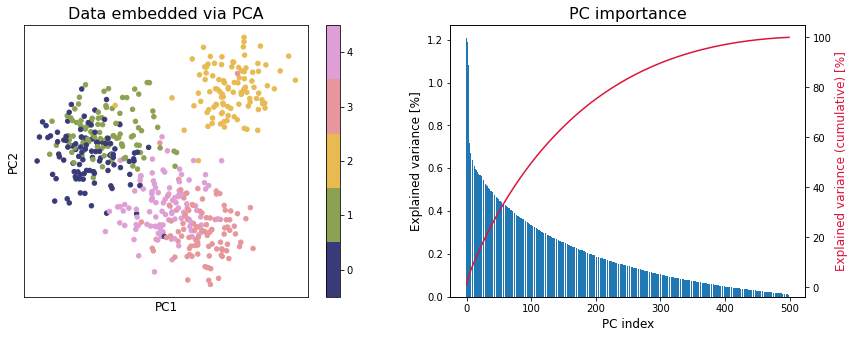

In [5]:
plot_pca(pca, embedding, y=y)

The beauty is $-$ the PCs are **sorted** by importance!

We can look at the Explained variance and decide ow many to keep!<br>
_E.g. the first **k** components that together explain 50% of the variance_

<font size=3><u>**Physical intuition**</u><font>
    
Imagine you have a system which has an _intrinsical_ direction of movement:

<table><tr>
    <td width=500>
        <img src="images/PCA_intuition.png">
        <center>
            <br>
            Figure 2.3. A poorly-chosen set of features which could benefit from PCA to find the underlying direction of motion.
            <br>
            (From <a href="https://arxiv.org/pdf/1404.1100.pdf">here</a>)<br>
        </center>
    </td>
</tr></table>

The X, Y, and Z variables **are correlated** by the motion along the spring axis.

$\rightarrow$ PCA might help us bypass the issue!

### In-class Exercise: Run your own PCA [15 mins]

**Objective**: Identify clusters in Kaggle's [Stellar Classification Dataset - SDSS17](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17).

**Task**: You will have to apply PCA to the dataset (restricted to a few numerical values), project into the first two PCs, and identify the clusters (by eye). 

In [6]:
import pandas as pd

df_star = pd.read_csv("data/star_classification.csv")
df_star = df_star.sample(n=1000, random_state=12)
# keeping only a few objects to speed up calculations

print('Full dataset:')
display(df_star.head(5))

features = ['u', 'g', 'r', 'i', 'z', 'redshift']
df_star_ = df_star[features]
print('Dataset to run PCA on:')
display(df_star_.head(5))

Full dataset:


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
23441,1.237658e+18,135.560105,44.898721,22.30567,21.43649,19.75798,18.96968,18.53585,2863,301,2,90,5.278428e+18,GALAXY,0.429219,4688,56008,760
90125,1.237653e+18,311.061235,-5.441456,17.91316,16.73492,16.57163,16.53089,16.53141,1737,301,5,25,2.157348e+18,STAR,-0.000100,1916,53269,450
57892,1.237650e+18,176.967168,-1.766684,23.00886,22.49020,20.71650,19.74547,19.15290,1140,301,5,161,4.267350e+18,GALAXY,0.553427,3790,55208,688
7228,1.237668e+18,160.382606,19.280301,19.80938,17.89119,16.83623,16.35335,15.95283,5313,301,6,12,2.791195e+18,GALAXY,0.128453,2479,54174,324
99545,1.237661e+18,221.711029,40.864862,24.32647,23.16088,21.35538,20.36712,19.68588,3699,301,3,201,9.568083e+18,GALAXY,0.586078,8498,57105,674


Dataset to run PCA on:


,u,g,r,i,z,redshift
23441,22.30567,21.43649,19.75798,18.96968,18.53585,0.429219
90125,17.91316,16.73492,16.57163,16.53089,16.53141,-0.000100
57892,23.00886,22.49020,20.71650,19.74547,19.15290,0.553427
7228,19.80938,17.89119,16.83623,16.35335,15.95283,0.128453
99545,24.32647,23.16088,21.35538,20.36712,19.68588,0.586078


In [7]:
# Hint: When normalizing, remember that `sklearn` accepts dataframes!

<hr style='height:1px'>

_Our solution_

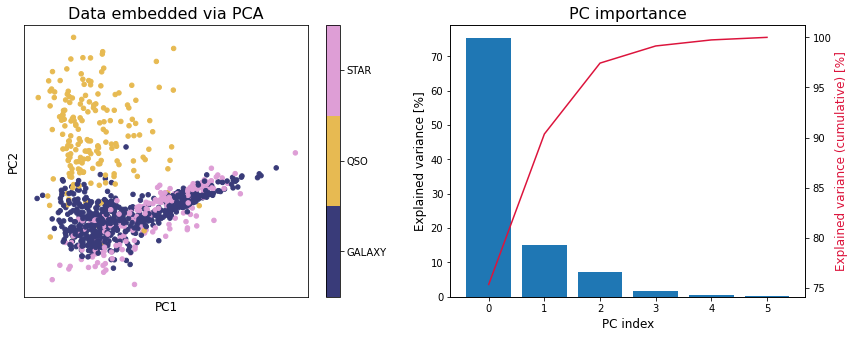

In [8]:
from sklearn.preprocessing import StandardScaler
df_star_n = StandardScaler().fit_transform(df_star_) 

from sklearn.decomposition import PCA

pca = PCA()
embedding = pca.fit(df_star_n).transform(df_star_n)

plot_pca(pca, embedding, y=df_star['class'].values)

Mh, not a perfect class separation. If only it existed a **_non_-linear** PCA ...

### Kernel PCA

PCA can use the **kernel trick** (just like in `SVM`) $\rightarrow$ **Kernelization** applies non-linear transformations to the data, then performs PCA in the transformed space. 

How? $-$ <u>Intuition</u>

The covariance matrix contain the multiplication of the data vectors among themselves:

$$ C_X = {1 \over n} = XX^T $$

Now, you can imagine that if use a trasformation $\Phi(.)$ to trasform the data to a new "**feature space**":

$$ X \rightarrow \Phi(X)$$

... in such feature space the covariance matrix will be composed of dot products of the type:

$$~\langle \Phi(X_i), \Phi(X_j)~\rangle$$

where $i$, $j$ are different samples.  
The kernel trick allows us to express this as:

$$~\langle \Phi(X_i), \Phi(X_j)~\rangle = K({X_i, X_j}) $$

- - -

<u>NOTE:</u> 

We <u>don't</u> define $\Phi(.)$ and _then_ find the associated $K(.,.)$.

On the contrary, we adopt a $K(.,.)$, and _assume_ there exists an associated $\Phi(.)$ (_which we never use anyways_).

$\rightarrow$ in principle, $\Phi(X)$ may belong to $\mathbb{R}^\infty$

- - -

E.g., **R**adial **B**asis **F**unction (**rbf**) kernel:
> $$K({X_i, X_j}) = e^{|| X_i - X_j ||^2 \over \gamma^2}$$

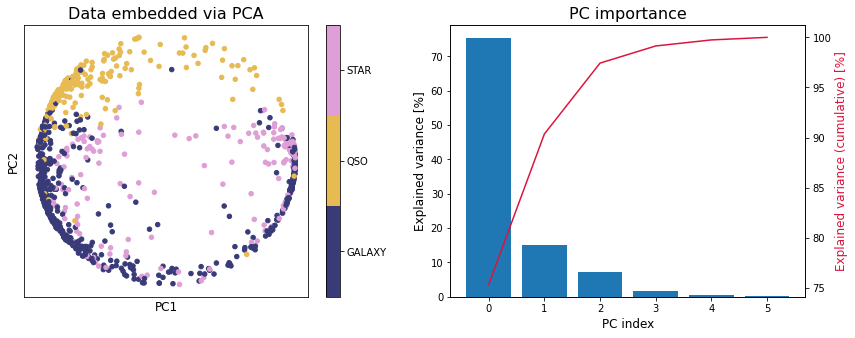

In [9]:
from sklearn.decomposition import KernelPCA

#kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=10)
#kernel_pca = KernelPCA(n_components=None, kernel="poly" degree=2)
kernel_pca = KernelPCA(n_components=None, kernel="cosine")

embedding = kernel_pca.fit(df_star_n).transform(df_star_n)

plot_pca(pca, embedding, y=df_star['class'].values)

<u>MPORTANT:</u> The result is _strongly dependent_ on the **hyperparameters**!
(_play with rbf kernel and gamma_)

##  In-class Exercise: Eigen-galaxies!

**Objective**: Let's try and visualize the Principal Components!

**Task**: Display the eigenvectors.

**Dataset**: We will use a dataset of galaxy images, the [Galaxy10 DECals Dataset](https://astronn.readthedocs.io/en/latest/galaxy10.html), nicely packaged into a dataframe.

Data type: images (21785 images)

Classes<br>
├── Class 0 (3461 images): Disk, Face-on, No Spiral<br>
├── Class 1 (6997 images): Smooth, Completely round<br>
├── Class 2 (6292 images): Smooth, in-between round<br>
├── Class 3 (394 images): Smooth, Cigar shaped<br>
├── Class 4 (1534 images): Disk, Edge-on, Rounded Bulge<br>
├── Class 5 (17 images): Disk, Edge-on, Boxy Bulge<br>
├── Class 6 (589 images): Disk, Edge-on, No Bulge<br>
├── Class 7 (1121 images): Disk, Face-on, Tight Spiral<br>
├── Class 8 (906 images): Disk, Face-on, Medium Spiral<br>
└── Class 9 (519 images): Disk, Face-on, Loose Spiral<br>

In [ ]:
%%time

import os
import requests

from pathlib import Path
script_path = str(Path().absolute())
print('Current path: %s\n\n' % script_path)

path_data = script_path + '/data'

# Downloading if dataset not found:
if not os.path.isfile(path_data+"/Galaxy10.h5"):
    url = "http://astro.utoronto.ca/~bovy/Galaxy10/Galaxy10.h5"
    r = requests.get(url, allow_redirects=True)
    open(path_data+"/Galaxy10.h5", "wb").write(r.content)

# Loading catalogue:
import h5py
import numpy as np
import pandas as pd
from prettytable import PrettyTable

with h5py.File(path_data+"/Galaxy10.h5", "r") as F:
    images = np.array(F["images"])
    labels = np.array(F["ans"])
    
# Dropping class 5, which only has 17 galaxies:
idxs_valid = np.where(labels != 5)[0]
images = images[idxs_valid]
labels = labels[idxs_valid]

classes = sorted(np.unique(labels))
print('There are %s classes' % len(classes))

print('Image array shape: %s\n' % str(np.shape(images)))

# Displaying one image for each class:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, len(classes), figsize=(14, 5))
plt.suptitle('Galaxy class examples', y=0.7, fontsize=14)

for i, class_ in enumerate(classes):
    idx = np.where(labels == class_)[0][0]
    # index of first galaxy in the list, for class <classs>
    ax = axes[i]
    ax.set_title('Class: %s' % class_)
    ax.imshow(images[idx])
    plt.setp(ax, xticks=[], yticks=[])
plt.show()

# Grabbing image properties:
n_y, n_x, n_colors = np.shape(images)[1], np.shape(images)[2], np.shape(images)[3]
# NOTE: Image dimensions are always transposed, when represented as matrices!
print('Original shape of the images: (n_x = %s, n_y = %s, n_colors = %s)\n\n' %\
      (n_x, n_y, n_colors))

Let's "**flatten**" the dataset, so we can use it in `sklearn`:
    
    1 row == 1 image
    1 pixel == 1 feature
    
<table><tr>
    <td width=500>
        <img src="images/Flattened_Image.png">
        <center>
            <br>
            Figure 2.4. Re-arrangement of pixels into features to "<i>flatten</i>" an image.
        </center>
    </td>
</tr></table>    

In [ ]:
%%time

# Flattening images to 1D arrays (and casting to float):
X_ = images.reshape([len(images), np.shape(images)[1]*np.shape(images)[2]*np.shape(images)[3]])
X_ = X_.astype(np.float32)
# TRICK: These are RGB images (integer values 0--256): we can convert to a
#        low-encoding float (32 instead of e.g. 64 bits) without losing information.

feature_names = ["pixel"+str(i) for i in range(np.shape(X_)[1])]

# Converting data to dataframe:
df_data_orig = pd.DataFrame(data=np.append(X_, labels[:,None],1), columns=feature_names+['y'])

# Balancing classes using pandas:
#
# For each class, keeping as many objects as for the class with min number
# of objects ...
df_data_g = df_data_orig.groupby('y')
df_data = pd.DataFrame(df_data_g.apply(lambda x: x.sample(df_data_g.size().min()).reset_index(drop=True)))
# Keeping only class of galaxies to better understand the PCs:
# df_data = df_data.loc[df_data['y'] ==7]
# Re-exctracting the matrices after rebalancing ...
X = df_data[feature_names].values
y = df_data['y'].values

print('Each class contains ~%s galaxies' % int(round(len(y)/len(classes))))

# Keeping only a [random] subset of the data to speed up calculations:
n_samples_keep = 1000 # max: len(X)
idxs_keep = np.random.randint(len(X), size=n_samples_keep)
X = X[idxs_keep]
y = y[idxs_keep]

# Displaying first 5 rows:
display(df_data.head(5))

table = PrettyTable()
table.title = str('Data shape')
table.field_names = ['X', 'y']
table.add_row([np.shape(X), np.shape(y)])
print(table)

First of all, let's perform the _linear_ PCA decomposition as usual ...

In [ ]:
%%time
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_n = scaler.fit_transform(X) 

from sklearn.decomposition import PCA

pca = PCA()
embedding = pca.fit_transform(X_n)

plot_pca(pca, embedding, y=y.astype(int))

**Part 1 [5 mins]:**

The `sklearn` PCA stores the eigenvectors (== _unit array giving the direction of the PC_) in:

> `pca.components_`
    
and the eigenvalues (== _lenght of the PC vector_) in:

> `pca.explained_variance_`
    
Each entry is 1 eigenvector eigenvalue.
Try to print one, to see the content:

<hr style='height:1px'>

_Our solution_

In [ ]:
print('The first eigenvector is:')
print(pca.components_[0])
print('... it has %s dimensions ...' % len(pca.components_[0]))
print('... and its eigenvalue is: %s' % pca.explained_variance_[0])

**Part 2 [10 mins]**:


Let's now plot the first 10 eigenvectors.

They are images, sooo ... we shall reshape them to (`n_x`, `n_y`, `n_colors`) plot them right.

In [ ]:
n_eigenvectors_to_plot = 10

fig = plt.figure(figsize=(16, 6))
for i in range(n_eigenvectors_to_plot):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    
    eigenvector_i = ...
    # eigenvector == unit_vector * size

    # Scaling to [0, 1] for visualization purposes:
    eigenvector_i = MinMaxScaler().fit_transform(eigenvector_i.reshape(-1,1))
    
    ax.imshow(pca.components_[i].reshape(..., ..., ...),
              cmap=plt.cm.bone)

<hr style='height:2px'>

_Our solution_

In [ ]:
from sklearn.preprocessing import MinMaxScaler

n_eigenvectors_to_plot = 10

fig = plt.figure(figsize=(16, 6))
for i in range(n_eigenvectors_to_plot):

    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    
    eigenvector_i = pca.components_[i] * pca.explained_variance_[i]
    # eigenvector == unit_vector * size
    
    # Scaling to [0, 1] for visualization purposes:
    eigenvector_i = MinMaxScaler().fit_transform(eigenvector_i.reshape(-1,1))

    ax.set_title('Eigen-galaxy %i' % i)
    ax.imshow(eigenvector_i.reshape(n_x, n_y, n_colors),
              cmap=plt.cm.bone)

$\rightarrow$ We can think of PCs as the _basic_ "**ingredients**" composing a galaxy.<br>
_&emsp; - PC1 maps a the intensity scale_<br>
_&emsp; - subsequent PCs map finer and finer morphological details_

The "**recipe**" to obtain galaxy _XYZ_ is to mix the ingredients using the "**dosage**" given by the _embedding values_.

- - -

More generally, PCA **decomposition** allows to break data along its _significant_ components.

## More on Data Preparation

Aside from **pre-processing** practices seen here, more exist $-$ including:

- **Non-linear feature reduction**<br>
  &emsp; &emsp; _e.g., t-SNE, UMAP_ $\rightarrow$ [2022 Summer School for Astrostatistics in Crete - ML Practices
](https://github.com/astrostatistics-in-crete/2022_summer_school/blob/main/ML_Practices/ML_Practices_S.ipynb)
- **Feature encoding**<br>
  &emsp; &emsp; _e.g., One Hot Encoding_ $\rightarrow$ [2022 Summer School for Astrostatistics in Crete - ML Practices
](https://github.com/astrostatistics-in-crete/2022_summer_school/blob/main/ML_Practices/ML_Practices_S.ipynb)
 
- **Inputing missing values**<br>
  &emsp; &emsp; _e.g., missingno, MICE and its variants_  $\rightarrow$
  [`missingno`](https://github.com/ResidentMario/missingno),
  [`sklearn.impute.IterativeImputer`](https://scikit-learn.org/stable/modules/impute.html),
  [`miceforest`](https://pypi.org/project/miceforest/)

- **Dealing with imbalanced classes**<br>
  &emsp; &emsp; _e.g., SMOTE_  $\rightarrow$[`imblearn.over_sampling.SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)
  
- **Removing outliers** (?)

- **Handling numerical exceptions** (zeros, NaNs!)

... and many more!

Have a look at this [post about Data Cleaning](https://towardsdatascience.com/automated-data-cleaning-with-python-94d44d854423) as a starting point! 

# Protocols

> **Protocols** = Correct methodologies to assess out ML model

Let's see a few, in order of complexity.

## Level 0 $-$ Comparing against baseline

> _Which is the minimum achievable score?_

<table><tr>
    <td width=200>
        <img src="images/Goku_Young.jpg">
    </td>
</tr></table>

Let's consider a simple dataset:

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
x1 = np.random.randint(10, size=10)
x2 = np.random.randint(10, 20, size=10)
y = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
df_data = pd.DataFrame(np.array([x1, x2, y]).T, columns=['x1', 'x2', 'class'])

display(df_data)

In [ ]:
from sklearn.linear_model import LogisticRegression

X = df_data[['x1','x2']].values
y = df_data[['class']].values.ravel()

clf = LogisticRegression(random_state=42)
clf.fit(X, y)

print('LogisticRegression | accuracy: %.2f' % clf.score(X, y))

How good is this result?

<details>
<summary><b>[Spoiler]</b></summary>    
    
A **Majority Class** classifier, i.e. a _trivial_ classifier which always returns the most frequent class seen in training, would have scored 90% accuracy!

<table><tr>
    <td width=200>
        <img src="images/Yamcha.jpg">
    </td>
</tr></table>
    
</details>

<font size=3><u>**Always compare against dummy estimators!**</u><font>

... or at least keep in mind the minimum achievable score $=$ **baseline**.  Having a comparison reference is <u>very important</u> when publishing, to convince about the goodness of your model.
    
In some cases, the baseline can also be found **theoretically**, it does not matter. 

Some examples of dummy estimators:
    
 - <u>Classification</u>:
   - **Random (Trivial) Classifier**: a classifier which returns a random class
   - **Stratified Classifier**: a classifier which returns a class with a probability following the distribution of classes seen in training
    
    [<code>sklearn</code> Dummy Classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
    
        
 - <u>Regression</u>:
   - **Constant Regressor**: a regressor which alwyas returns a value, e.g. the mean ($y_{train}$) or median ($y_{train}$)
    
    [<code>sklearn</code> Dummy Regressors](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)

... or create your own based on the problem you are addressing!

## Level 1 $-$ Cross Validation (a.k.a. $k$-fold Cross Validation)

> _Am I overfitting the train set?_

<table><tr>
    <td width=200>
        <img src="images/Goku.png">
    </td>
</tr></table>

We have seen the basic **train/[validation]/test** split:

<table><tr>
    <td width=640>
        <img src="images/Train_Test.png">
        <center>
            <br>
            Figure 3.1.  Indicative recipe for splitting a dataset into the train and test sets.
            <br>
        </center>
    </td>
</tr></table>

_Would the results change if we shuffled the data differently?_

<font size=3><u>**Cross Validation**</u><font>

It involves _re-fitting_ the model over different partitionings of the dataset:

<table><tr>
    <td width=800>
        <img src="images/CV_k4.jpg">
        <center>
            <br>
            Figure 3.2.  Data splitting for a Cross Validation with $k = 4$ folds.
        </center>
    </td>
</tr></table>

A **$k$-fold CV** splits the data in $k$ parts (**folds**), and, at each iteration:
   - uses **$k$-1** folds for training
   - uses the **remaining** fold for testing (_although we indistinctively call it **validation** set, in this context_)

The model is tested $k$ times, always on unseen data.

In this way, CV actually tackles 2 issues:

- Assessment of **bias**<br>
  _(i.e. how much the model depends on a specific training set)_

- Exploitation of the **whole dataset**<br>
  _(i.e. all data are eventually used for both training and testing)_

Each model fit produces a performance score, therefore we can obtain both an **average** estimate, and a **uncertainty** on it.

<u>IMPORTANT:</u> While the CV gives performance estimates, the final model shall be **_re_-trained on all** the data.<br>
$~~~~~~~~~~~~~~~~~~~$ We can reasonably assume that the re-trained model will be at least as performing as the CV average.<br>
$~~~~~~~~~~~~~~~~~~~$ (Actually, you shall _re_-fit on all data also when you use the simpler train/validation/test protocol).

- - -

**Q:** What is the right $k$?<br> 
**R:** Common values range between 3 and 10, but depends on:
- how many data we have<br>
- how much time we have<br>

because for larger $k$ we got more estimates, but in exchange we get:

- a smaller test set at each iteration
- more computations


<font size=3><u>**Variants**</u><font>

- **Repeated CV**: CV, but repeated $n$ times with different shuffling

- **Stratified CV**: CV, but the demographics of each fold is representative of the data (e.g. same class demoographics)

### In-class Exercise: Make your own CV [20 mins]

**Objective**: Compare the performance _distributions_ of 2 classifiers.

**Task**: You will have to:

1. Pick 2 classifiers of your liking (e.g., see alist [here](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html))
2. Loop over the CV iterations
3. Inside ach iteration:
    - Split the data in train and test
    - Fit both classifiers
    - Assess the accuracy of both classifiers
    - Store the result for the curent iteration
4. Create a plot showing the distributions of results 

<u>Hint</u>: Use a CV with at least 10 folds (_increment, if you like, once the code works_), and $-$ in the final plot $-$ use 5 bins (_or else it would be too coarse)_.

**Dataset**: We will use  Kaggle's [Stellar Classification Dataset - SDSS17](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17), restricted to just a few magnitudes.<br>
The target of the classification is the object type.

In [1]:
import pandas as pd

df_star = pd.read_csv("data/star_classification.csv")
df_star = df_star.sample(n=1000, random_state=12)
# keeping only a few objects to speed up calculations

#print('Full dataset:')
#display(df_star.head(5))

features = ['u', 'g', 'r']#, 'i', 'z', 'redshift']
df_star_ = df_star[features+['class']]
print('Dataset for our exercise:')
display(df_star_.head(5))

X = df_star_[features].values
y = df_star_['class'].values

Dataset for our exercise:


,u,g,r,class
23441,22.30567,21.43649,19.75798,GALAXY
90125,17.91316,16.73492,16.57163,STAR
57892,23.00886,22.49020,20.71650,GALAXY
7228,19.80938,17.89119,16.83623,GALAXY
99545,24.32647,23.16088,21.35538,GALAXY


In [2]:
from sklearn.model_selection import KFold

cv = 10
# number of CV folds

# Splitting the folds:
#   The `KFold` method allows us to directly get the train and test indexes
#   across the iterations, sparing us the tedious index tracking
kf = KFold(n_splits=cv)
kf.get_n_splits(X);

In [ ]:
%%time

############################################
# Replace "..." with the appropriate code! #
############################################

from sklearn ... # import classifier 1
from sklearn ... # import classifier 2
from sklearn.metrics import accuracy_score

# Defining the classifiers of choice:
clf_1 = ...
clf_2 = ...

scores_1 = []
scores_2 = []
# list of scores across the iterations

# CV iterations:
for k, (idxs_train, idxs_test) in enumerate(kf.split(X)):
    print('Iteration %s' % (k+1))

    X_train = ...
    X_test  = ...
    y_train = ...
    y_test  = ...
    
    print('\t- Fitting')
    ...
    ...
    
    print('\t- Predicting labels')
    ...
    ...
    
    print('\t- Assessing performance and storing')
    score_1 = ...
    score_2 = ...
    
    scores_1.append(score_1)
    scores_2.append(score_2)

print('Re-fitting on all the available data')    
# NOTE: We don't need it later, it is just here as a reminder of good practice.
...
...

print('Plotting score distributions and their average values')    
...
...

<hr style='height:1px'>

_Our solution_

In [3]:
%%time
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Defining the classifiers of choice:
clf_1 = svm.SVC(kernel='linear', C=5)
clf_2 = RandomForestClassifier()

scores_1 = []
scores_2 = []
# list of scores across the iterations

# CV iterations:
for k, (idxs_train, idxs_test) in enumerate(kf.split(X)):
    print('Iteration %s' % (k+1))

    X_train = X[idxs_train]
    X_test  = X[idxs_test]
    y_train = y[idxs_train]
    y_test  = y[idxs_test]
    
    print('\t- Fitting on train fold(s)')
    clf_1.fit(X_train, y_train)
    clf_2.fit(X_train, y_train)

    print('\t- Predicting on test fold')
    yhat_test_1 = clf_1.predict(X_test)
    yhat_test_2 = clf_2.predict(X_test)
    
    print('\t- Assessing performance and storing')
    score_1 = accuracy_score(y_test, yhat_test_1)
    score_2 = accuracy_score(y_test, yhat_test_2)
    # NOTE: We could just as well use the `clf.score()` method, but better
    #       to always explicitly specify the score we pick.
    
    scores_1.append(score_1)
    scores_2.append(score_2)

print('Re-fitting on all the available data')    
# NOTE: We don't need it later, it is just here as a reminder of good practice.
clf_1_final = clf_1.fit(X, y)
clf_2_final = clf_2.fit(X, y)

Iteration 1
	- Fitting on train fold(s)
	- Predicting on test fold
	- Assessing performance and storing
Iteration 2
	- Fitting on train fold(s)
	- Predicting on test fold
	- Assessing performance and storing
Iteration 3
	- Fitting on train fold(s)
	- Predicting on test fold
	- Assessing performance and storing
Iteration 4
	- Fitting on train fold(s)
	- Predicting on test fold
	- Assessing performance and storing
Iteration 5
	- Fitting on train fold(s)
	- Predicting on test fold
	- Assessing performance and storing
Iteration 6
	- Fitting on train fold(s)
	- Predicting on test fold
	- Assessing performance and storing
Iteration 7
	- Fitting on train fold(s)
	- Predicting on test fold
	- Assessing performance and storing
Iteration 8
	- Fitting on train fold(s)
	- Predicting on test fold
	- Assessing performance and storing
Iteration 9
	- Fitting on train fold(s)
	- Predicting on test fold
	- Assessing performance and storing
Iteration 10
	- Fitting on train fold(s)
	- Predicting on test f

Plotting score distributions and their average values


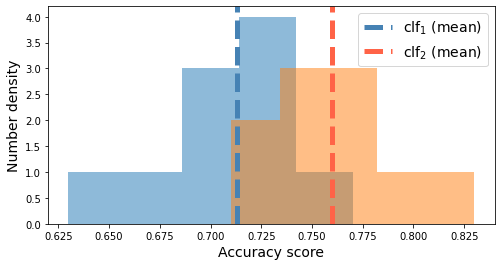

In [6]:
import numpy as np
from matplotlib import pyplot as plt

print('Plotting score distributions and their average values')    

fig = plt.figure(figsize=(8,4))
plt.hist(scores_1, bins=5, color='C0', alpha=0.5)
plt.hist(scores_2, bins=5, color='C1', alpha=0.5)
plt.axvline(x=np.mean(scores_1), ls='--', lw=5, color='steelblue',
            label='clf$_{1}$ (mean)')
plt.axvline(x=np.mean(scores_2), ls='--', lw=5, color='tomato',
            label='clf$_{2}$ (mean)')
plt.xlabel('Accuracy score', fontsize=14)
plt.ylabel('Number density', fontsize=14)
plt.legend(fontsize=14, bbox_to_anchor=(1., 1.))
plt.show()

**<font size=5>Ah!</font> As you can see, the result _does_ depend on the split!**

Without CV, i.e. if we only picked 1 specific train/test split $-$ and with some bad luck $-$ we might have got to [<u>wrong</u>] the conclusion that SVM performed better than RF.

<u>IMPORTANT:</u> The **best model** is the one that **generalizes best**.

- - -

### Final remarks on CV

Clearly, we do not need to reinvent the wheel $\rightarrow$ `sklearn.model_selection.cross_val_score`

In [ ]:
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear', C=5)

scores = cross_val_score(clf, X, y, cv=3, scoring="accuracy")

print('Scores for classifier %s over the CV:' % clf)
print('\t', scores)

<font size=3><u>Summary</u></font>

- CV can be used to assess the **generalized behaviour** of an estimator

- Can I use CV to **compare** 2 estimators and pick the best? $\rightarrow$ **YES.**

- Can I use CV to **compare** 2 estimators, pick the best, <u>and</u> claim its average score? $\rightarrow$ **NO!** (_see next notebook_)